In [1]:
import sys
print(sys.version)

3.7.11 (default, Jul 27 2021, 07:03:16) 
[Clang 10.0.0 ]


# 1 - PIP INSTALL =================

In [2]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
    

time: 492 µs (started: 2021-10-11 11:19:42 +02:00)


In [3]:
#!pip install pyspark==3.1.2 tensorflow==2.4.1 h5py==2.10.0

time: 335 µs (started: 2021-10-11 11:19:43 +02:00)


# 2 -  IMPORT =================

In [4]:
from IPython.display import Audio
import time
import os
#import cv2
import pkg_resources
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from io import StringIO
import types
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import tensorflow 
import tensorflow as tf
tensorflow.get_logger().setLevel('ERROR')
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import tensorframes as tfs
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# spark
import pyspark
from pyspark.ml import Pipeline
from pyspark.ml.feature import StandardScaler, MinMaxScaler,PCA,VectorAssembler
from pyspark.ml.linalg import Vectors, VectorUDT, DenseVector
from pyspark.ml.image import ImageSchema

from pyspark import SparkContext
from pyspark.sql import SparkSession, Row,functions as F
from pyspark.sql.functions import col, pandas_udf, PandasUDFType,udf,lit, split,col
from pyspark.sql.types import ArrayType, StringType, IntegerType, DoubleType, DataType, FloatType

from pyspark.ml.classification import RandomForestClassifier,LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D


import numpy as np
import random
import pandas as pd
from PIL import Image
import numpy as np
import io

from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, StandardScaler
from pyspark.ml.linalg import Vectors

#from elephas.ml_model import ElephasEstimator
import matplotlib.pyplot as plt

import h5py
import tensorframes
print("pyspark :", pyspark.__version__)
print("tensorflow :", tf.__version__)
print("tensorframes :", tensorframes.__version__)
print("h5py :", h5py.__version__)
#time: 1s

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from pyspark.sql.functions import col, pandas_udf, PandasUDFType
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from pyspark.sql.functions import lit, split,col
from pyspark.sql import functions as F


#pyspark : 3.1.2
#tensorflow : 2.4.1
#tensorframes : 2.0.0
#h5py : 2.10.0

pyspark : 3.1.2
tensorflow : 2.4.1
tensorframes : 2.0.0
h5py : 2.10.0
time: 18.6 s (started: 2021-10-11 11:19:43 +02:00)


# 3 - FUNCTION ==================

In [5]:
def _sp_Stop():
    spark.stop()
    sc.stop()

def mFinito():
    display(Audio('/Users/soso/Downloads/son_multiplex_canal_plus.mp3', autoplay=True))

tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    a = "temps de traitement       ",round(duration1/60,2), "minutes"
    return a 

time: 3.16 ms (started: 2021-10-11 11:20:16 +02:00)


# 4 - Spark context ==================

In [6]:
conf = SparkConf().setAppName('Spark_ML_Pipeline').setMaster('local[8]')
sc = SparkContext(conf=conf)
sql_context = SQLContext(sc)
sc.setLogLevel('OFF')

21/10/11 11:20:23 WARN Utils: Your hostname, Sofianes-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.13 instead (on interface en0)
21/10/11 11:20:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/11 11:20:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


time: 15.3 s (started: 2021-10-11 11:20:17 +02:00)


# 5 - Spark Session ==================

In [7]:
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('t_1 App') \
    .getOrCreate()

time: 3.53 s (started: 2021-10-11 11:20:32 +02:00)


# 6 - Spark Function ==================

In [8]:
def model_fn():
    model = ResNet50(weights=None, include_top=False)
    model.set_weights(bc_model_weights.value)
    return model

def preprocess(content):
    img = Image.open(io.BytesIO(content)).resize([224, 224])
    arr = img_to_array(img)
    return preprocess_input(arr)

def featurize_series(model, content_series):
    input = np.stack(content_series.map(preprocess))
    preds = model.predict(input)
    output = [p.flatten() for p in preds]
    return pd.Series(output)


@pandas_udf('array<float>', PandasUDFType.SCALAR_ITER)
def featurize_udf(content_series_iter):
    model = model_fn()
    for content_series in content_series_iter:
        yield featurize_series(model, content_series)
        


time: 821 ms (started: 2021-10-11 11:20:37 +02:00)


# 7 - Spark model ==================

In [9]:
model = ResNet50(include_top=False)
bc_model_weights = sc.broadcast(model.get_weights())

2021-10-11 11:20:40.486729: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-11 11:20:40.493425: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


time: 4.59 s (started: 2021-10-11 11:20:40 +02:00)


# 8 - Spark.py ==================

In [13]:
path03 = '/Users/soso/Desktop/sampleaws'
print('Import ======== 1 ========')
#path03 = '/Users/soso/Desktop/_sample_local_2'
images = spark.read.format("binaryFile") \
  .option("pathGlobFilter", "*.jpg") \
  .option("recursiveFileLookup", "true") \
  .load(path03)

images.printSchema()


Import ======== 1 ========
root
 |-- path: string (nullable = true)
 |-- modificationTime: timestamp (nullable = true)
 |-- length: long (nullable = true)
 |-- content: binary (nullable = true)

time: 78.5 ms (started: 2021-10-11 11:21:34 +02:00)


In [17]:
print('Ajout Target ======== 2 ========')
df_1 =  images.withColumn('target', split(images['path'], '/')[5])
print((df_1.count(), len(df_1.columns)))
print(df_1.show(3))


Ajout Target ======== 2 ========
(12, 5)
+--------------------+-------------------+------+--------------------+------+
|                path|   modificationTime|length|             content|target|
+--------------------+-------------------+------+--------------------+------+
|file:/Users/soso/...|2021-09-12 19:26:54|  5352|[FF D8 FF E0 00 1...|  Plum|
|file:/Users/soso/...|2021-09-12 19:26:56|  5268|[FF D8 FF E0 00 1...|  Plum|
|file:/Users/soso/...|2021-09-12 19:26:56|  4985|[FF D8 FF E0 00 1...|  Plum|
+--------------------+-------------------+------+--------------------+------+
only showing top 3 rows

None
time: 236 ms (started: 2021-10-01 19:30:48 +02:00)


In [18]:
print('Isol Target ======== 3 ========')
y = df_1.select(col("target"))
print('y   ', y.show(2))


Isol Target ======== 3 ========
+------+
|target|
+------+
|  Plum|
|  Plum|
+------+
only showing top 2 rows

y    None
time: 109 ms (started: 2021-10-01 19:30:55 +02:00)


In [19]:
print('Creation UDF ======== 4 ========')
df_2 = df_1.select(col("path"), featurize_udf("content").alias("features"),col("target"))
print('features_df   ', df_2.show(2))


Creation UDF ======== 4 ========


2021-10-01 19:31:10.421546: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:31:10.422321: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:31:12.106750: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


+--------------------+--------------------+------+
|                path|            features|target|
+--------------------+--------------------+------+
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|  Plum|
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|  Plum|
+--------------------+--------------------+------+
only showing top 2 rows

features_df    None
time: 15 s (started: 2021-10-01 19:31:01 +02:00)


In [20]:
print('Convert Dense ======== 5 ========')
ud_f = udf(lambda r: Vectors.dense(r), VectorUDT())
df_3 = df_2.repartition(10).withColumn('features_dense', ud_f('features'))
print('dense_df   ', df_3.show(2))


Convert Dense ======== 5 ========


2021-10-01 19:31:36.485316: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:31:36.486392: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:31:36.501541: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:31:36.502494: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:31:36.496760: I tensorflow/com

+--------------------+--------------------+------+--------------------+
|                path|            features|target|      features_dense|
+--------------------+--------------------+------+--------------------+
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|Tomato|[0.0,0.0,0.0,0.0,...|
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|  Plum|[0.0,0.0,0.0,0.0,...|
+--------------------+--------------------+------+--------------------+
only showing top 2 rows

dense_df    None
time: 18.7 s (started: 2021-10-01 19:31:27 +02:00)


In [21]:
print('Standard Scal ======== 6 ========')
standardizer = StandardScaler(inputCol="features_dense", outputCol="feat_scal",withStd=True, withMean=True)
df_4 = standardizer.fit(df_3).transform(df_3)
print('Standard_df   ', df_4.show(2))

Standard Scal ======== 6 ========


2021-10-01 19:32:16.889419: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:32:16.889565: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:32:16.890126: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:32:16.890304: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:32:19.203238: I tensorflow/com

+--------------------+--------------------+------+--------------------+--------------------+
|                path|            features|target|      features_dense|           feat_scal|
+--------------------+--------------------+------+--------------------+--------------------+
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|Tomato|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|  Plum|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|
+--------------------+--------------------+------+--------------------+--------------------+
only showing top 2 rows

Standard_df    None
time: 32.3 s (started: 2021-10-01 19:31:49 +02:00)


PCA ======== 7.0 ========


2021-10-01 19:33:14.990529: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:33:14.990529: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:33:14.991350: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:33:14.991437: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:33:17.717197: I tensorflow/com

--- reduc
---> variance
8 = 90% exp 


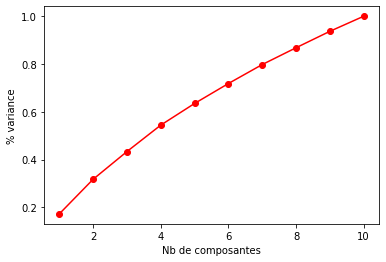

8
time: 55.1 s (started: 2021-10-01 19:32:59 +02:00)


In [23]:
print('PCA ======== 7.0 ========')
pca = PCA(k = 10, inputCol = 'feat_scal', outputCol = 'feat_pca')
reduc = pca.fit(df_4)
print('--- reduc')
variance = reduc.explainedVariance
print('---> variance')
for i in range(10):
    a = variance.cumsum()[i]
    if a >= 0.90:
        print("{} = 90% exp ".format(i))
        comp_val = i 
        break


# visuel
plt.plot(np.arange(len(variance))+1, variance.cumsum(),c="red",marker='o')
plt.xlabel("Nb de composantes")
plt.ylabel("% variance")
plt.show(block=False)

print(i)

In [26]:
print('PCA ======== 7.1 ========')
print(comp_val)
pca = PCA(k=comp_val, inputCol='feat_scal', outputCol='feat_reduit')
pca_model = pca.fit(df_4)
df_5 = pca_model.transform(df_4)
print('Pca_df   ', df_5.show(2))


PCA ======== 7.1 ========
8


2021-10-01 19:34:42.100285: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:34:42.100320: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:34:42.101039: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:34:42.101075: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:34:44.582875: I tensorflow/com

+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|                path|            features|target|      features_dense|           feat_scal|         feat_reduit|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|Tomato|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|[38.4252949179364...|
|file:/Users/soso/...|[0.0, 0.0, 0.0, 0...|  Plum|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|[43.0982224973242...|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+
only showing top 2 rows

Pca_df    None
time: 1min (started: 2021-10-01 19:34:31 +02:00)


In [28]:
print('Select Col ======== 8 ========')
df_6 = df_5.select(col("target"),col("feat_reduit"),col("path"))
df_6.show(5)

Select Col ======== 8 ========


+-------+--------------------+--------------------+
| target|         feat_reduit|                path|
+-------+--------------------+--------------------+
| Tomato|[38.4252949179364...|file:/Users/soso/...|
|   Plum|[43.0982224973242...|file:/Users/soso/...|
|   Plum|[61.7850925404766...|file:/Users/soso/...|
|Avocado|[48.3882972973224...|file:/Users/soso/...|
| Banana|[-291.43307452766...|file:/Users/soso/...|
+-------+--------------------+--------------------+
only showing top 5 rows

time: 12.3 s (started: 2021-10-01 19:36:36 +02:00)


In [36]:
print('Indexer======== 9 ========')
indexer = StringIndexer(inputCol="target", outputCol="target_Idx")
df_7 = indexer.fit(df_6).transform(df_6) 
df_7.show(6)

Indexer======== 9 ========


2021-10-01 19:43:33.377633: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:43:33.377943: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:43:33.378663: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:43:33.378863: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:43:33.381608: I tensorflow/com

+-------+--------------------+--------------------+----------+
| target|         feat_reduit|                path|target_Idx|
+-------+--------------------+--------------------+----------+
| Tomato|[38.4252949179364...|file:/Users/soso/...|       3.0|
|   Plum|[43.0982224973242...|file:/Users/soso/...|       2.0|
|   Plum|[61.7850925404766...|file:/Users/soso/...|       2.0|
|Avocado|[48.3882972973224...|file:/Users/soso/...|       0.0|
| Banana|[-291.43307452766...|file:/Users/soso/...|       1.0|
|Avocado|[27.5435618614422...|file:/Users/soso/...|       0.0|
+-------+--------------------+--------------------+----------+
only showing top 6 rows

time: 27.9 s (started: 2021-10-01 19:43:17 +02:00)


In [37]:
print('Select Col - part 2 ======== 10 ========')
df_8 = df_7.select(col("target_Idx"),col("feat_reduit"),col("path"))
df_8.show(5)

Select Col - part 2 ======== 10 ========


+----------+--------------------+--------------------+
|target_Idx|         feat_reduit|                path|
+----------+--------------------+--------------------+
|       3.0|[38.4252949179364...|file:/Users/soso/...|
|       2.0|[43.0982224973242...|file:/Users/soso/...|
|       2.0|[61.7850925404766...|file:/Users/soso/...|
|       0.0|[48.3882972973224...|file:/Users/soso/...|
|       1.0|[-291.43307452766...|file:/Users/soso/...|
+----------+--------------------+--------------------+
only showing top 5 rows

time: 12.3 s (started: 2021-10-01 19:43:57 +02:00)


In [38]:
print(' train_data, test_data ======== 11 ========')
train_data, test_data = df_8.randomSplit([.75,.25])

 train_data, test_data ======== 11 ========
time: 22.4 ms (started: 2021-10-01 19:44:10 +02:00)


In [39]:
print(' LogisticRegression ======== 12 ========')
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="target_Idx",featuresCol="feat_reduit")
LogFModel = lr.fit(train_data)
predictions = LogFModel.transform(test_data)
selected = predictions.select("target_Idx", "prediction", "probability")

evaluator = MulticlassClassificationEvaluator(labelCol="target_Idx", predictionCol="prediction",metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

Def_sc = str(accuracy)
print(selected.show(10))
print("Test set accuracy = " + str(accuracy))

 LogisticRegression ======== 12 ========


2021-10-01 19:44:46.578319: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:44:46.578489: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:44:46.579038: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:44:46.579160: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:44:49.724210: I tensorflow/com

+----------+----------+--------------------+
|target_Idx|prediction|         probability|
+----------+----------+--------------------+
|       2.0|       2.0|[1.13269656054404...|
|       0.0|       0.0|[0.54256803793481...|
+----------+----------+--------------------+

None
Test set accuracy = 1.0
time: 59 s (started: 2021-10-01 19:44:10 +02:00)


# 9 - GO =================

In [ ]:
STOP()

In [ ]:
import faulthandler
faulthandler.enable()

In [40]:
df_8.show(3)

2021-10-01 19:46:44.840684: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:46:44.841729: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:46:44.845850: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:46:44.847069: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:46:44.893026: I tensorflow/com

+----------+--------------------+--------------------+
|target_Idx|         feat_reduit|                path|
+----------+--------------------+--------------------+
|       3.0|[38.4252949179364...|file:/Users/soso/...|
|       2.0|[43.0982224973242...|file:/Users/soso/...|
|       2.0|[61.7850925404766...|file:/Users/soso/...|
+----------+--------------------+--------------------+
only showing top 3 rows

time: 28.1 s (started: 2021-10-01 19:46:29 +02:00)


In [41]:
print('Export ======== 13 ========')
local_df = df_8.toPandas()
local_df.to_csv('local_df.csv', index=False)

Export ======== 13 ========


2021-10-01 19:48:08.155090: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:48:08.156061: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:48:08.164199: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-01 19:48:08.165665: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-01 19:48:08.192431: I tensorflow/com

time: 29.6 s (started: 2021-10-01 19:47:58 +02:00)


In [1]:
import pandas as pd

df = pd.read_csv('local_df.csv')

In [2]:
df.head(10)

,target_Idx,feat_reduit,path
0,3.0,"[38.42529491793645,35.63909488233723,12.272702...",file:/Users/soso/Desktop/sampleaws/Tomato/0_10...
1,2.0,"[43.098222497324294,30.7313251478329,-10.62804...",file:/Users/soso/Desktop/sampleaws/Plum/13_100...
2,2.0,"[61.78509254047669,76.83516284860349,170.78333...",file:/Users/soso/Desktop/sampleaws/Plum/r_164_...
3,0.0,"[48.38829729732244,18.74204731944288,-156.5936...",file:/Users/soso/Desktop/sampleaws/Avocado/0_1...
4,1.0,"[-291.43307452766965,86.19693760327065,-2.6793...",file:/Users/soso/Desktop/sampleaws/Banana/0_10...
5,0.0,"[27.543561861442246,-6.933685146506952,-65.810...",file:/Users/soso/Desktop/sampleaws/Avocado/r_1...
6,2.0,"[37.53561468047036,24.541564454259078,5.978762...",file:/Users/soso/Desktop/sampleaws/Plum/r_309_...
7,3.0,"[29.009077276469302,17.64176232210025,4.111363...",file:/Users/soso/Desktop/sampleaws/Tomato/r2_3...
8,0.0,"[36.01044500649334,28.551151780907514,-70.6695...",file:/Users/soso/Desktop/sampleaws/Avocado/r_3...
9,1.0,"[-28.294861548230685,-131.07150337017694,6.294...",file:/Users/soso/Desktop/sampleaws/Banana/r_32...
